In [2]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset/Training'
)

Found 2890 files belonging to 4 classes.


In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/dataset/Testing'
)

Found 404 files belonging to 4 classes.


In [ ]:
dataset.class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [ ]:
#Folder path
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/Colab Notebooks/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/Colab Notebooks/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [ ]:
#Shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=101)
X_train.shape

(808, 150, 150, 3)

In [ ]:
#Train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 101)

In [ ]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train = Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
#Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 40, validation_split = 0.1)

Epoch 1/40
21/21 [==============================] - 2s 98ms/step - loss: 0.0918 - accuracy: 0.9648 - val_loss: 0.2483 - val_accuracy: 0.9452
Epoch 2/40
21/21 [==============================] - 2s 97ms/step - loss: 0.0773 - accuracy: 0.9786 - val_loss: 0.4230 - val_accuracy: 0.9315
Epoch 3/40
21/21 [==============================] - 2s 97ms/step - loss: 0.0717 - accuracy: 0.9801 - val_loss: 0.2985 - val_accuracy: 0.9589
Epoch 4/40
21/21 [==============================] - 2s 94ms/step - loss: 0.0518 - accuracy: 0.9862 - val_loss: 0.2982 - val_accuracy: 0.9589
Epoch 5/40
21/21 [==============================] - 2s 95ms/step - loss: 0.0838 - accuracy: 0.9740 - val_loss: 0.4168 - val_accuracy: 0.9315
Epoch 6/40
21/21 [==============================] - 2s 94ms/step - loss: 0.1187 - accuracy: 0.9633 - val_loss: 0.4164 - val_accuracy: 0.9589
Epoch 7/40
21/21 [==============================] - 2s 95ms/step - loss: 0.0708 - accuracy: 0.9694 - val_loss: 0.1671 - val_accuracy: 0.9589
Epoch 8/40
21

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

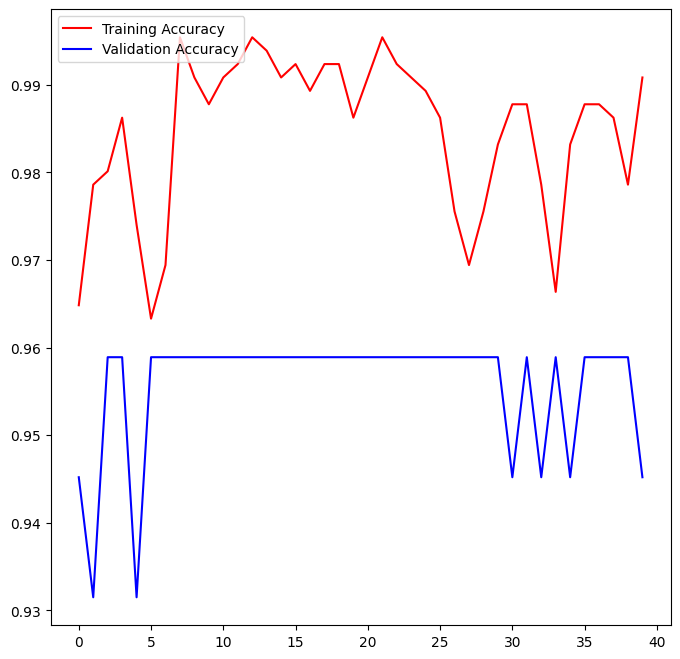

In [ ]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(8, 8))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc = 'upper left')
plt.show()

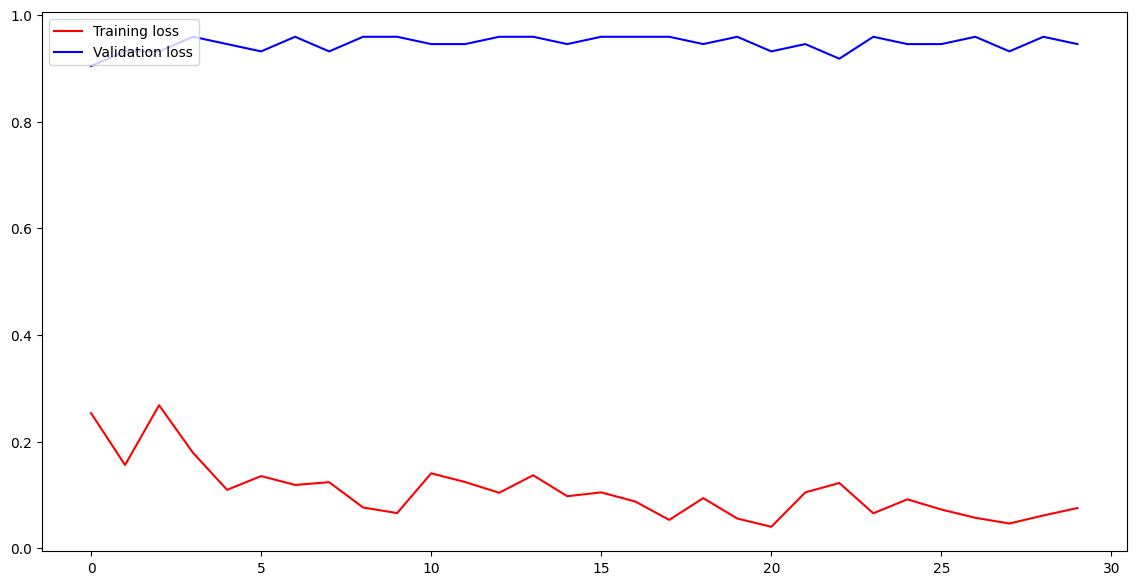

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_acc, 'b', label="Validation loss")
plt.legend(loc = 'upper left')
plt.show()

In [8]:
img = cv2.imread(r'C:\Users\HP\Desktop\BRAINTUMOR(MRI)\dataset\Testing\glioma_tumor\image(1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [9]:
img_array = img_array.reshape(1, 150, 150, 3)
img_array.shape

(1, 150, 150, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

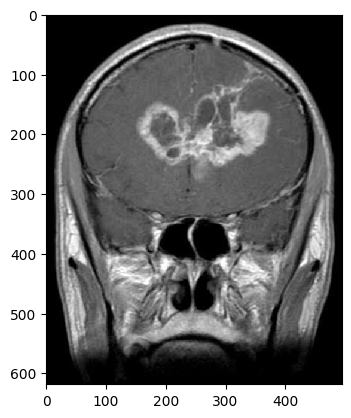

In [12]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'C:\Users\HP\Desktop\BRAINTUMOR(MRI)\dataset\Testing\glioma_tumor\image(1).jpg')
plt.imshow(img, interpolation = 'nearest')
plt.show

In [ ]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 865ms/step


1

In [5]:
model = tf.keras.models.load_model('braintumor.h5')

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step


0